In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import pandas.core.tools.datetimes as datetools

Data collection and processing

In [6]:
heart_df=pd.read_csv("/content/heartnewdataset.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
heart_df.rename(columns={'male':'Sex'},inplace=True)


removing the null values

In [8]:
heart_df.dropna(axis=0,inplace=True)


In [9]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.1169
Time:                        16:09:45   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
Sex                 0.5740      0.107      5.343      0.000       0.363       0.785
age                 0.0640      0.007      9.787      0.000       0.051       0.077
currentSmoker       0.0732      0.155      0.473      0.636      -0.230       0.376
cigsPerDay          0.0184      0.006      3.003      0.003       0.006       0.030
BPMeds              0.1446      0.232      0.622      0.534      -0.311       0.600
prevalentStroke     0.7191      0.489      1.471      0.141      -0.239       1.677
prevalentHyp        0.2146      0.136      1.574      0.116      -0.053       0.482
diabetes            0.0025      0.312      0.008      0.994      -0.609       0.614
totChol             0.0022      0.001      2.074      0.038       0.000       0.004
sysBP               0.0153      0.004      4.080      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.619      0.536      -0.016       0.009
BMI                 0.0103      0.013      0.820      0.412      -0.014       0.035
heartRate          -0.0023      0.004     -0.550      0.583      -0.010       0.006
glucose             0.0076      0.002      3.408      0.001       0.003       0.012
===================================================================================
"""

In [11]:
import sklearn
new_features=heart_df[['age','Sex','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
print(x_train)

      age  Sex  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
1820   55    0              1         5.0     0.0                0   
2979   45    0              0         0.0     0.0                0   
3247   51    1              1        40.0     0.0                0   
1191   60    1              1        20.0     0.0                0   
146    59    0              1         1.0     0.0                0   
...   ...  ...            ...         ...     ...              ...   
3612   49    0              0         0.0     0.0                0   
3452   42    0              1         9.0     0.0                0   
1944   39    0              0         0.0     0.0                0   
2549   64    0              0         0.0     0.0                0   
3306   56    1              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
1820             1         0    280.0  144.0   79.0  19.50       79.0     75.0

In [14]:
sklearn.metrics.accuracy_score(y_test,y_pred)


0.8693333333333333

<AxesSubplot:>

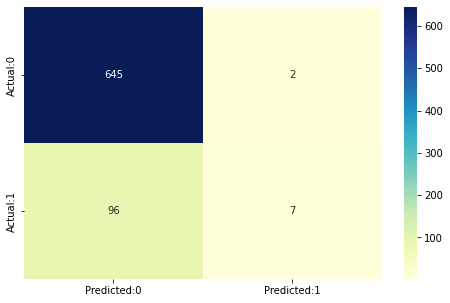

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [16]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
'Negative Predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative Likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8693333333333333 
 The Missclassification = 1-Accuracy =  0.1306666666666667 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.06796116504854369 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9969088098918083 
 Positive Predictive value = TP/(TP+FP) =  0.7777777777777778 
 Negative Predictive Value = TN/(TN+FN) =  0.8704453441295547 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  21.98543689320356 
 Negative Likelihood Ratio = (1-Sensitivity)/Specificity =  0.9349288778505307


In [17]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.732523,0.267477
1,0.673163,0.326837
2,0.773645,0.226355
3,0.899839,0.100161
4,0.958155,0.041845


In [18]:
from sklearn import preprocessing
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2 = preprocessing.Binarizer(threshold=i/10).transform(y_pred_prob_yes)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[241 406]
 [ 13  90]] 
 with 331 correct predictions and 13 Type II errors( False Negatives) 

 Sensitivity:  0.8737864077669902 Specificity:  0.37248840803709427 



With 0.2 threshold the Confusion Matrix is  
 [[509 138]
 [ 50  53]] 
 with 562 correct predictions and 50 Type II errors( False Negatives) 

 Sensitivity:  0.5145631067961165 Specificity:  0.7867078825347759 



With 0.3 threshold the Confusion Matrix is  
 [[601  46]
 [ 82  21]] 
 with 622 correct predictions and 82 Type II errors( False Negatives) 

 Sensitivity:  0.20388349514563106 Specificity:  0.9289026275115919 



With 0.4 threshold the Confusion Matrix is  
 [[636  11]
 [ 89  14]] 
 with 650 correct predictions and 89 Type II errors( False Negatives) 

 Sensitivity:  0.13592233009708737 Specificity:  0.9829984544049459 





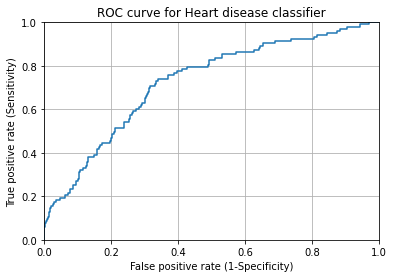

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [20]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])


0.7241487972869556

In [21]:
input_data=(0,63,0,0,0,0,0,0,205,138,71,33.11,60,85)

# change the input data to a numpy array to make it easy to reshape
input_data_as_numpy_arrya= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on one instance
input_data_reshaped= input_data_as_numpy_arrya.reshape(1,-1)

prediction = logreg.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("The person does not have a heart disease")
else:
  print("The person has heart disease")

[1]
The person has heart disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [22]:
import pickle

In [23]:
filename='heart_disease_prediction-OF_model.sav'
pickle.dump(logreg,open(filename,'wb'))

In [24]:
loaded_model=pickle.load(open('heart_disease_prediction-OF_model.sav','rb'))